# Topic 1

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
mpl.rc("savefig", dpi=300)

- p = cluster proportion
- a = ic50/position of each cluster
- b = slope of each cluster

In [2]:
# p_list = [0.1, 0.1, 0.8]
p_list = [0.1, 0.2, 0.7]

a_list = [1, 4, 5]

b_list = [1, 1, 1]
# b_list = [1, 2, 3]
# b_list = [5, 1, 3]



In [3]:
def cal_y(x, a_list, b_list, p_list):
    y = 0.0
    for a, b, p in zip(a_list, b_list, p_list):
        y += p*1/(1+2**((a-x)*b))
    return y

def get_y(x, a, b):
    return 1/(1+2**((a-x)*b))

def cal_m(x, a_list, b_list, p_list):
    m = 0.0
    for a, b, p in zip(a_list, b_list, p_list):
        m += p*(np.log(2)*2**(b*(a-x))*b)/((1+2**(b*(a-x)))**2)
    return m

## Topic 1.1

In [4]:
x = np.sum(np.multiply(p_list, np.multiply(a_list, b_list)))
print (x)
print (cal_y(x, a_list, b_list, p_list))

4.4
0.48337208999621206


In [5]:
cal_m(x, a_list, b_list, p_list)

0.1556820286213527

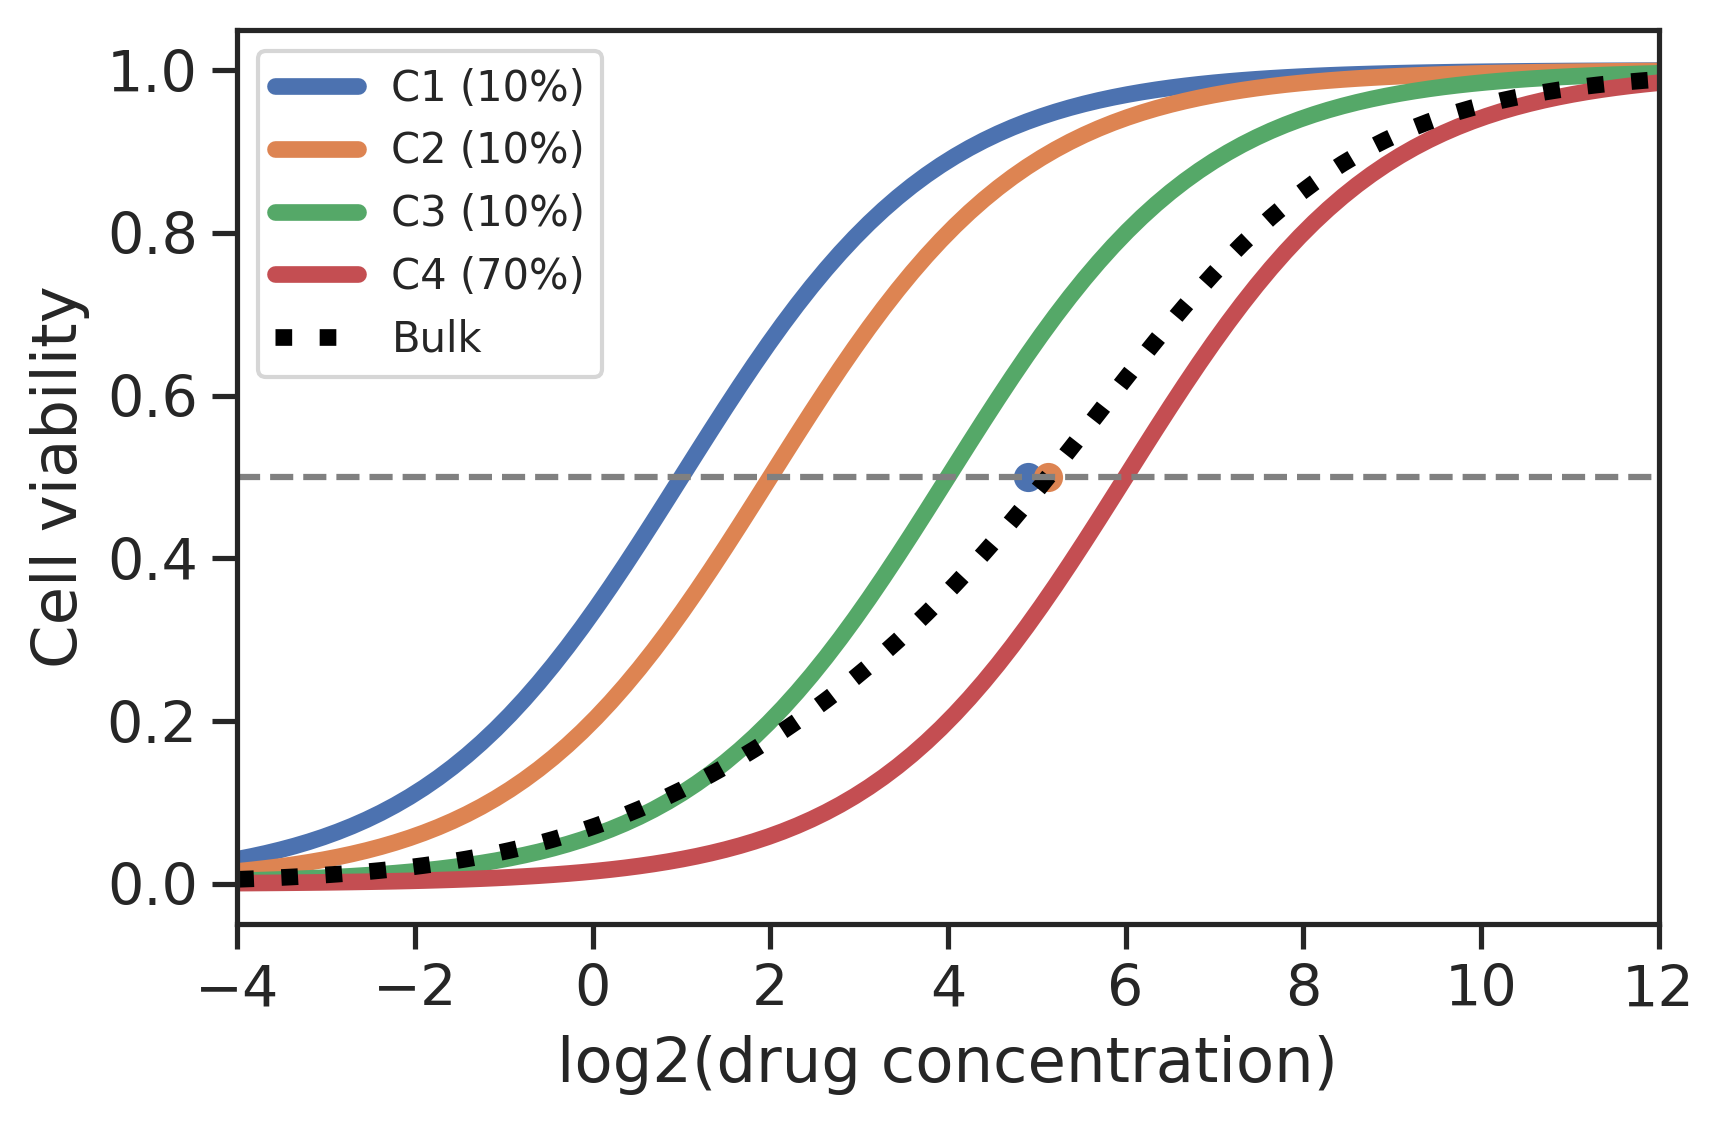

In [6]:
sns.set(font_scale=1.25)
sns.set_style('ticks')

x_seq = np.linspace(-4, 12, 100)

# p_list = [0.1, 0.2, 0.2, 0.5]
# a_list = [1, 2, 4, 6]
# b_list = [5, 1, 1, 3]

# marks = [4.30, 4.422077]

p_list = [0.1, 0.1, 0.1, 0.7]
a_list = [1, 2, 4, 6]
b_list = [1, 1, 1, 1]

marks = [4.90, 5.126038]

for a, b, p, i in zip(a_list, b_list, p_list, range(len(a_list))):
    plt.plot(x_seq, get_y(x_seq, a, b), linewidth=4, label='C{:d} ({:d}%)'.format(i+1, int(p*100)))
    
for m in marks:
    plt.scatter(m, 0.5)
    
y_seq = cal_y(x_seq, a_list, b_list, p_list)
plt.plot(x_seq, y_seq, color='black', linewidth=4, label='Bulk', linestyle=':')
    
plt.axhline(0.5, color='grey', linestyle='--')
plt.xlim((-4, 12))
plt.ylabel('Cell viability')
plt.xlabel('log2(drug concentration)')
plt.legend(fontsize=10)
plt.tight_layout()
# plt.savefig('curve.pdf')
# plt.clf()

Step 0: x=4.9000, y=0.4697, m=0.1323
Step 1: x=5.1291, y=0.5004, m=0.1357
Step 2: x=5.1260, y=0.5000, m=0.1357


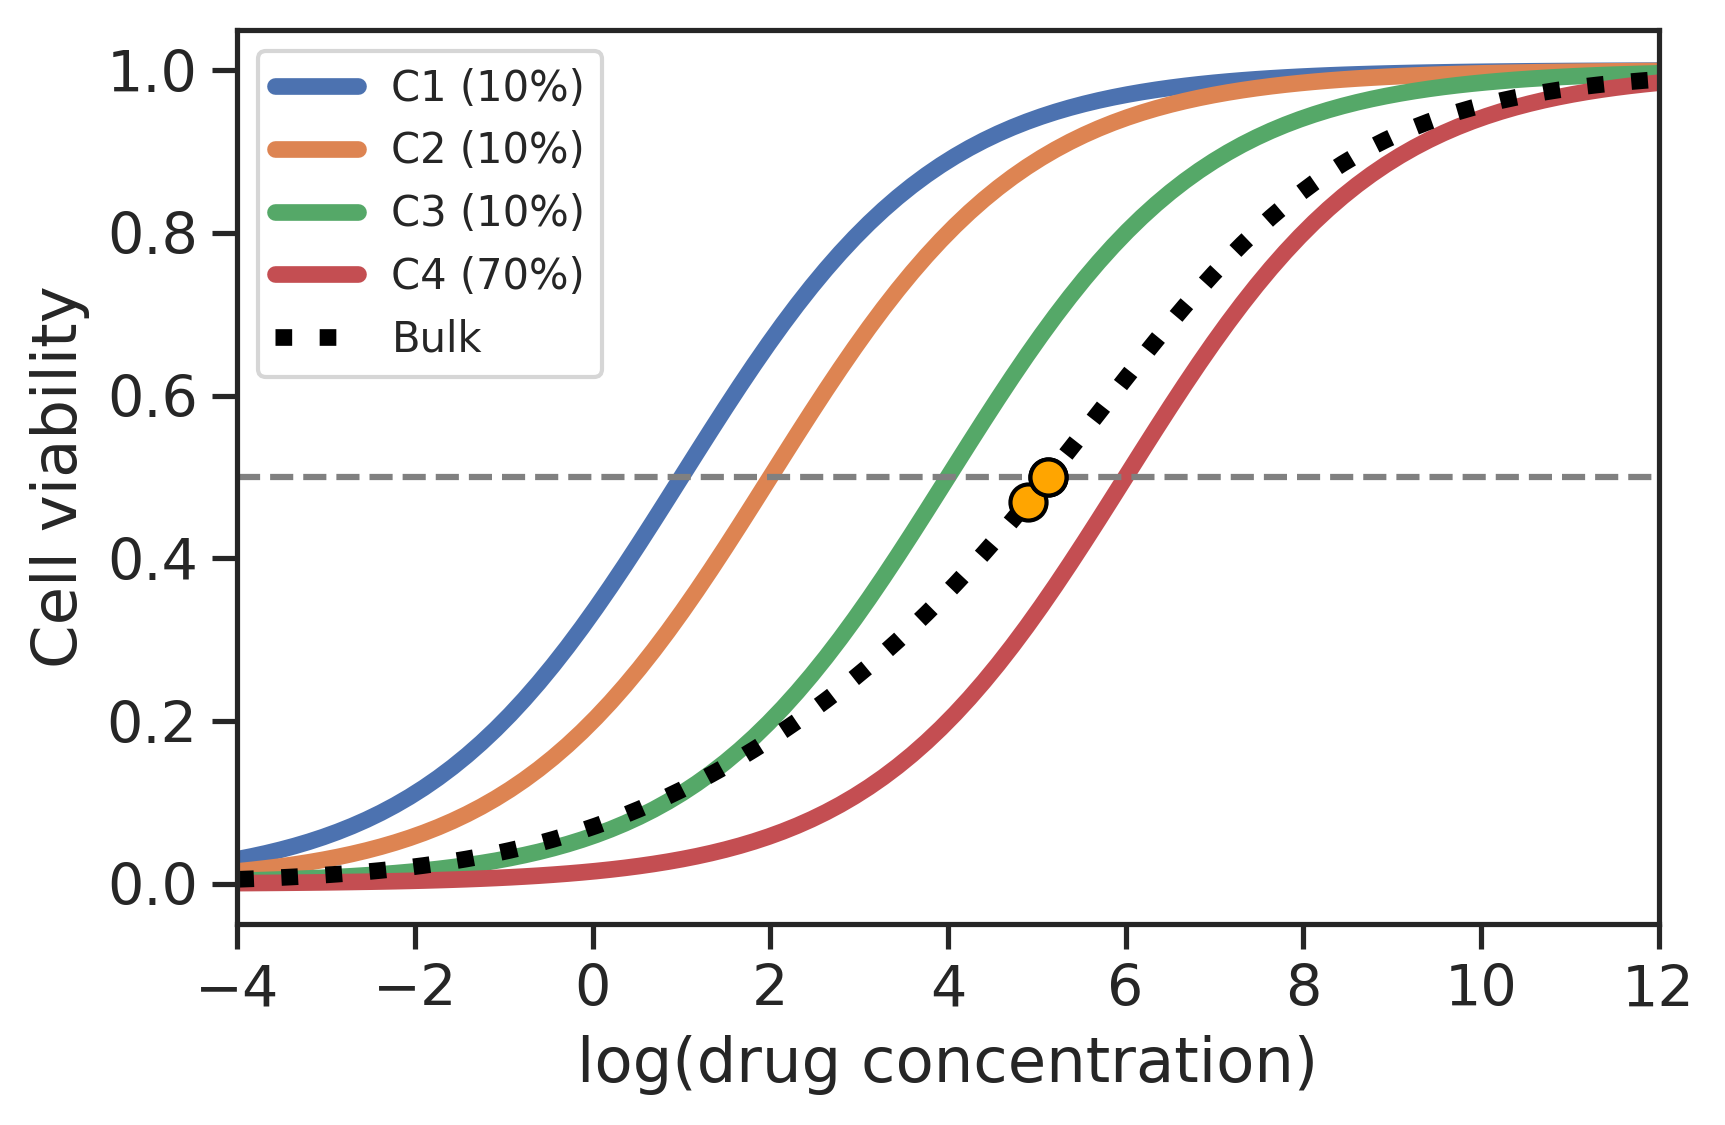

In [7]:
sns.set(font_scale=1.25)
sns.set_style('ticks')

x_seq = np.linspace(-4, 12, 100)

for a, b, p, i in zip(a_list, b_list, p_list, range(len(a_list))):
    plt.plot(x_seq, get_y(x_seq, a, b), linewidth=4, label='C{:d} ({:d}%)'.format(i+1, int(p*100)))
    
y_seq = cal_y(x_seq, a_list, b_list, p_list)
plt.plot(x_seq, y_seq, color='black', linewidth=4, label='Bulk', linestyle=':')

x = np.sum(np.multiply(a_list, p_list))

y = 0
step = 0
while ~(y <= 0.5001 and y >= 0.4999) :
    m = cal_m(x, a_list, b_list, p_list)
    y = cal_y(x, a_list, b_list, p_list)
    print ("Step {:d}: x={:.4f}, y={:.4f}, m={:.4f}".format(step, x, y, m))

    x1 = x + 1
    x2 = x - 1
    
    y1 = m * (x1 - x) + y
    y2 = m * (x2 - x) + y
    plt.scatter((x1+x2)/2, (y1+y2)/2, s=75, color='orange', linewidth=1, edgecolor='black', alpha=1, zorder=3)
    
    x = x + ((0.5-y)/m)
    step += 1
    
plt.axhline(0.5, color='grey', linestyle='--')
plt.xlim((-4, 12))
plt.ylabel('Cell viability')
plt.xlabel('log(drug concentration)')
plt.legend(fontsize=10)
plt.tight_layout()

In [8]:
def iterative_calculate_ic50(p_list, a_list, b_list, n_steps=2):
    x_init = np.sum(np.multiply(a_list, p_list))
    x = x_init

    y = 0
    step = 0
    while ~(y <= 0.5001 and y >= 0.4999) :
        m = cal_m(x, a_list, b_list, p_list)
        y = cal_y(x, a_list, b_list, p_list)
        # print ("Step {:d}: x={:.4f}, y={:.4f}, m={:.4f}".format(step, x, y, m))

        x1 = x + 1
        x2 = x - 1

        y1 = m * (x1 - x) + y
        y2 = m * (x2 - x) + y

        x = x + ((0.5-y)/m)
        step += 1
        
        if step <= n_steps:
            x_at_step = x
    
    return x_init, x, x_at_step

In [9]:
# all_p_list = [[0.3, 0.3, 0.4],
#               [0.1, 0.2, 0.7],
#               [0.2, 0.4, 0.4],
#              ]

# all_a_list = [[1, 1, 1],
#               [1, 2, 3],
#               [1, 4, 5],
#              ]

# all_b_list = [[2, 2, 2],
#               [1, 2, 3],
#               [5, 1, 3],
#              ]

# fix_b_list = [1, 1, 1]

# fig, axes = plt.subplots(ncols=3, figsize=(14, 4), sharey=False)

# naive_err = []
# newton_fix_slope_error = []

# for ax, p_list in zip(axes, all_p_list):
    
#     ic50_init_list = []
#     ic50_list = []
#     err_list = []
    
#     for a_list in all_a_list:
#         for b_list in all_b_list:
            
#             ic50_init, ic50 = iterative_calculate_ic50(p_list, a_list, b_list)
#             ic50_init_list += [ic50_init]
#             ic50_list += [ic50]
#             err_list += [ic50_init - ic50]
#             print ((p_list, a_list, b_list), ic50_init, ic50, ic50_init - ic50)
    
#     x_ticks = list(range(len(err_list)))
#     ax.scatter(x_ticks, err_list, color='black')
#     ax.vlines(ymin=0, ymax=err_list, x=x_ticks, color='red')
#     ax.axhline(y=0, color='grey')
#     ax.set_ylim((-0.75, 0.25))
#     ax.set_yticks(np.arange(-0.75, 0.26, 0.25))
#     ax.set_xticks(x_ticks)
#     ax.set_xticklabels(['C{}'.format(x+1) for x in x_ticks])
#     ax.set_title(' : '.join(["{:.1f}".format(p) for p in p_list]))
    
#     ax.set_ylabel('Naive est. - Newton-like est.')
#     ax.set_xlabel('Conditions')
    
# plt.tight_layout(w_pad=2.5)
# sns.despine()

# plt.savefig('../figure/supplementary_combine_ic50.svg')

In [10]:
condition_list = []

for n_cluster in range(2, 10+1):
    # print (n_cluster)
    
    equal_p = np.zeros(n_cluster) + (1/n_cluster)
    bias_p_list = [2**c for c in range(n_cluster)]
    bias_p = bias_p_list/np.sum(bias_p_list)
    dominant_p = [0.8] + list(np.zeros(n_cluster-1) + (0.2/(n_cluster-1)))
    
    # print (equal_p, bias_p, dominant_p)
    
    equal_slope = np.ones(n_cluster)
    vary_slope = np.linspace(start=1, stop=3, num=n_cluster)
    dominant_slope = [5] + list(np.ones(n_cluster-1))
    
    # print (equal_slope, various_slope, dominant_slope)
    
    equal_ic50 = np.ones(n_cluster)
    vary_ic50 = np.linspace(start=1, stop=5, num=n_cluster)
    dominant_ic50 = [5] + list(np.ones(n_cluster-1))
    
    # print (equal_ic50, vary_ic50, dominant_ic50)
    
    for p_name, p_list in zip(['equal_p', 'bias_p', 'dominant_p'], [equal_p, bias_p, dominant_p]):
        for s_name, s_list in zip(['equal_slope', 'vary_slope'], [equal_slope, vary_slope]):#, dominant_slope]:
            for ic_name, ic_list in zip(['vary_ic50', 'dominant_ic50'], [vary_ic50, dominant_ic50]):#, dominant_ic50]:
                condition_list += [[p_name, s_name, ic_name, p_list, s_list, ic_list]]
                condition_list += [[p_name, s_name, ic_name, p_list, s_list[::-1], ic_list]]
                condition_list += [[p_name, s_name, ic_name, p_list, s_list, ic_list[::-1]]]
                condition_list += [[p_name, s_name, ic_name, p_list, s_list[::-1], ic_list[::-1]]]
                condition_list += [[p_name, s_name, ic_name, p_list[::-1], s_list, ic_list]]
                condition_list += [[p_name, s_name, ic_name, p_list[::-1], s_list[::-1], ic_list]]
                condition_list += [[p_name, s_name, ic_name, p_list[::-1], s_list, ic_list[::-1]]]
                condition_list += [[p_name, s_name, ic_name, p_list[::-1], s_list[::-1], ic_list[::-1]]]

In [11]:
len(condition_list)

864

In [140]:
results = []

for p_name, s_name, ic_name, p_list, b_list, a_list in condition_list:
    
    ic50_init_list = []
    ic50_list = []
    fix_b_list = np.ones(len(p_list))
            
    ic50_init, ic50, ic50_at_step = iterative_calculate_ic50(p_list, a_list, b_list)
    ic50_init_list += [ic50_init]
    ic50_list += [ic50]
    _, ic50_default_slope, _ = iterative_calculate_ic50(p_list, a_list, fix_b_list)

    results += [[p_name, ic_name, s_name, 
                 '|'.join(["{:.2f}".format(p) for p in p_list]), 
                 '|'.join(["{:.2f}".format(a) for a in a_list]), 
                 '|'.join(["{:.2f}".format(b) for b in b_list]), 
                 ic50, ic50_init, ic50_default_slope, ic50_at_step]]

In [141]:
result_df = pd.DataFrame(results, columns=['condition_p', 'condition_a', 'condition_b', 'p_list', 'a_list', 'b_list', 'ic50', 'ic50_init', 'ic50_default_slope', 'ic50_at_step'])

result_df.loc[:, 'naive_err'] = (np.abs(result_df['ic50_init'] - result_df['ic50']) / result_df['ic50']) * 100
result_df.loc[:, 'newton_default_slope_err'] = (np.abs(result_df['ic50_default_slope'] - result_df['ic50']) / result_df['ic50']) * 100
result_df.loc[:, 'newton_limit_step_err'] = (np.abs(result_df['ic50_at_step'] - result_df['ic50']) / result_df['ic50']) * 100

# result_df.loc[:, 'naive_err'] = np.power(2, np.abs(result_df['ic50_init'] - result_df['ic50']))
# result_df.loc[:, 'newton_default_slope_err'] = np.power(2, np.abs(result_df['ic50_default_slope'] - result_df['ic50']))
# result_df.loc[:, 'newton_limit_step_err'] = np.power(2, np.abs(result_df['ic50_at_step'] - result_df['ic50']))

In [142]:
result_df = result_df.drop_duplicates(subset=['p_list', 'a_list', 'b_list'])
print (result_df.shape)
result_df.head()

(510, 13)


,condition_p,condition_a,condition_b,p_list,a_list,b_list,ic50,ic50_init,ic50_default_slope,ic50_at_step,naive_err,newton_default_slope_err,newton_limit_step_err
0,equal_p,vary_ic50,equal_slope,0.50|0.50,1.00|5.00,1.00|1.00,3.0,3.0,3.0,3.000000,0.0,0.0,0.000000
2,equal_p,vary_ic50,equal_slope,0.50|0.50,5.00|1.00,1.00|1.00,3.0,3.0,3.0,3.000000,0.0,0.0,0.000000
16,equal_p,vary_ic50,vary_slope,0.50|0.50,1.00|5.00,1.00|3.00,4.0,3.0,3.0,4.041816,25.0,25.0,1.045393
17,equal_p,vary_ic50,vary_slope,0.50|0.50,1.00|5.00,3.00|1.00,2.0,3.0,3.0,1.958184,50.0,50.0,2.090785
18,equal_p,vary_ic50,vary_slope,0.50|0.50,5.00|1.00,1.00|3.00,2.0,3.0,3.0,1.958184,50.0,50.0,2.090785


In [131]:
# all_p_list = [[0.3, 0.3, 0.4],
#               [0.1, 0.2, 0.7],
#               [0.1, 0.3, 0.6],
#              ]

# all_a_list = [[1, 1, 2],
#               [1, 2, 3],
#               [1, 4, 5],
#              ]

# all_b_list = [[1, 1, 1],
#               [1, 2, 3],
#               [5, 1, 3],
#              ]

# fix_b_list = [1, 1, 1]
# conditions_list = ['Equal slopes', 'Similar slopes', 'Different slopes']

# results = []

# for p_list in all_p_list:
    
#     ic50_init_list = []
#     ic50_list = []
    
#     for a_list, condition in zip(all_a_list, conditions_list):
#         for b_list in all_b_list:
            
#             ic50_init, ic50, ic50_at_step = iterative_calculate_ic50(p_list, a_list, b_list)
#             ic50_init_list += [ic50_init]
#             ic50_list += [ic50]
#             _, ic50_default_slope, _ = iterative_calculate_ic50(p_list, a_list, fix_b_list)

#             results += [[condition, p_list, a_list, b_list, ic50, ic50_init, ic50_default_slope, ic50_at_step]]
    

# all_p_list = [[0.25, 0.25, 0.25, 0.25],
#               [0.1, 0.2, 0.2, 0.5],
#               [0.1, 0.1, 0.1, 0.7],
#              ]

# all_a_list = [[1, 1, 2, 2],
#               [1, 2, 3, 4],
#               [1, 2, 4, 6],
#              ]

# all_b_list = [[1, 1, 1, 1],
#               [1, 1, 2, 2],
#               [5, 1, 1, 3],
#              ]

# fix_b_list = [1, 1, 1, 1]



# for p_list in all_p_list:
    
#     ic50_init_list = []
#     ic50_list = []
    
#     for a_list, condition in zip(all_a_list, conditions_list):
        
#         for b_list in all_b_list:
            
#             ic50_init, ic50, ic50_at_step = iterative_calculate_ic50(p_list, a_list, b_list)
#             ic50_init_list += [ic50_init]
#             ic50_list += [ic50]
#             _, ic50_default_slope, _ = iterative_calculate_ic50(p_list, a_list, fix_b_list)

#             results += [[condition, p_list, a_list, b_list, ic50, ic50_init, ic50_default_slope, ic50_at_step]]
    

# result_df = pd.DataFrame(results, columns=['condition', 'p_list', 'a_list', 'b_list', 'ic50', 'ic50_init', 'ic50_default_slope', 'ic50_at_step'])

# result_df.loc[:, 'naive_err'] = (np.abs(result_df['ic50_init'] - result_df['ic50']) / result_df['ic50']) * 100
# result_df.loc[:, 'newton_default_slope_err'] = (np.abs(result_df['ic50_default_slope'] - result_df['ic50']) / result_df['ic50']) * 100
# result_df.loc[:, 'newton_limit_step_err'] = (np.abs(result_df['ic50_at_step'] - result_df['ic50']) / result_df['ic50']) * 100

# # result_df.loc[:, 'naive_err'] = np.power(2, np.abs(result_df['ic50_init'] - result_df['ic50']))
# # result_df.loc[:, 'newton_default_slope_err'] = np.power(2, np.abs(result_df['ic50_default_slope'] - result_df['ic50']))
# # result_df.loc[:, 'newton_limit_step_err'] = np.power(2, np.abs(result_df['ic50_at_step'] - result_df['ic50']))

# result_df.sort_values('naive_err', ascending=False)

In [143]:
(result_df['newton_default_slope_err'] <= result_df['naive_err']).sum()

401

In [144]:
(result_df['newton_default_slope_err'] <= result_df['naive_err']).sum() / result_df.shape[0]

0.7862745098039216

In [145]:
# plot_df = result_df[['naive_err', 'newton_default_slope_err', 'newton_limit_step_err']].stack().reset_index()
plot_df = result_df[['naive_err', 'newton_default_slope_err']].stack().reset_index()

plot_df.columns = ['condition_id', 'error_type', '% relative error']
plot_df = pd.merge(plot_df, result_df[['condition_p', 'condition_a', 'condition_b']], left_on='condition_id', right_index=True)
plot_df.head()

,condition_id,error_type,% relative error,condition_p,condition_a,condition_b
0,0,naive_err,0.0,equal_p,vary_ic50,equal_slope
1,0,newton_default_slope_err,0.0,equal_p,vary_ic50,equal_slope
2,2,naive_err,0.0,equal_p,vary_ic50,equal_slope
3,2,newton_default_slope_err,0.0,equal_p,vary_ic50,equal_slope
4,16,naive_err,25.0,equal_p,vary_ic50,vary_slope


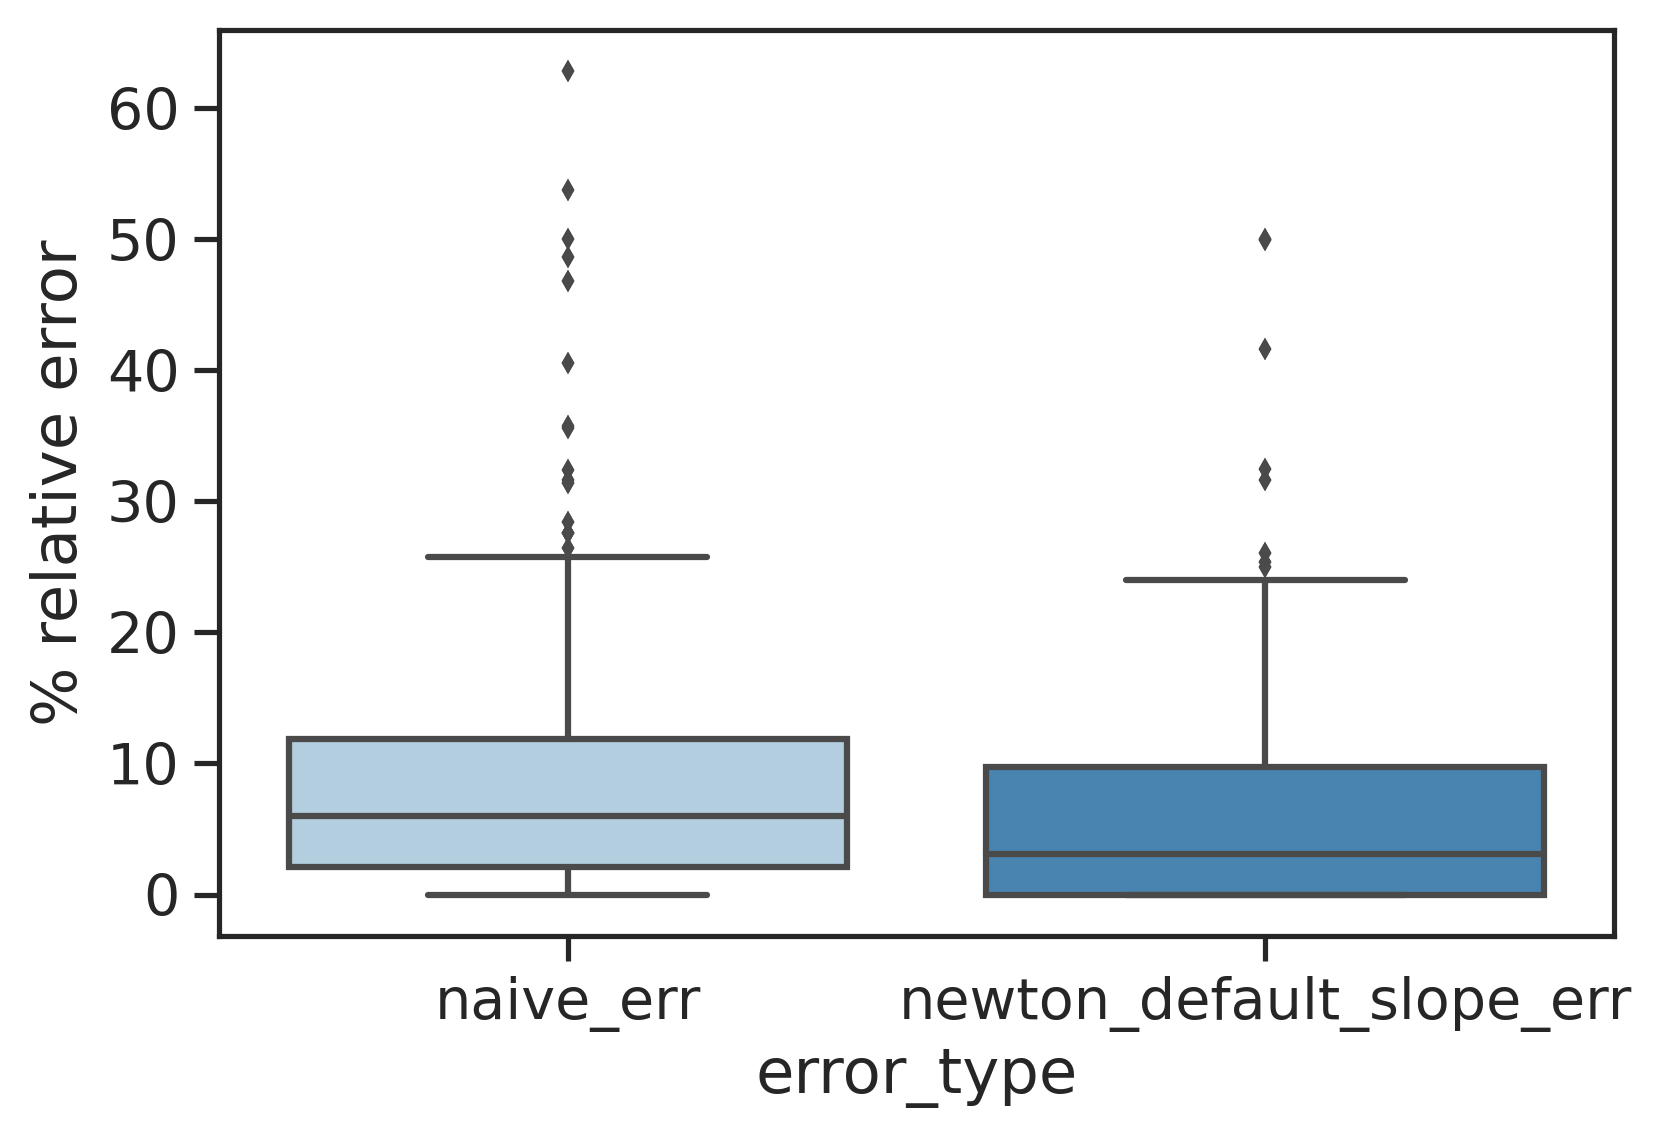

In [146]:
sns.boxplot(data=plot_df, x='error_type', y='% relative error', fliersize=2.5, palette='Blues')

In [147]:
plot_df.groupby('error_type')['% relative error'].describe()

,count,mean,std,min,25%,50%,75%,max
error_type,,,,,,,,
naive_err,510.0,9.129587,10.105262,0.0,2.129965,5.975165,11.837943,62.812791
newton_default_slope_err,510.0,6.289797,8.141337,0.0,0.000000,3.088992,9.752731,50.000000


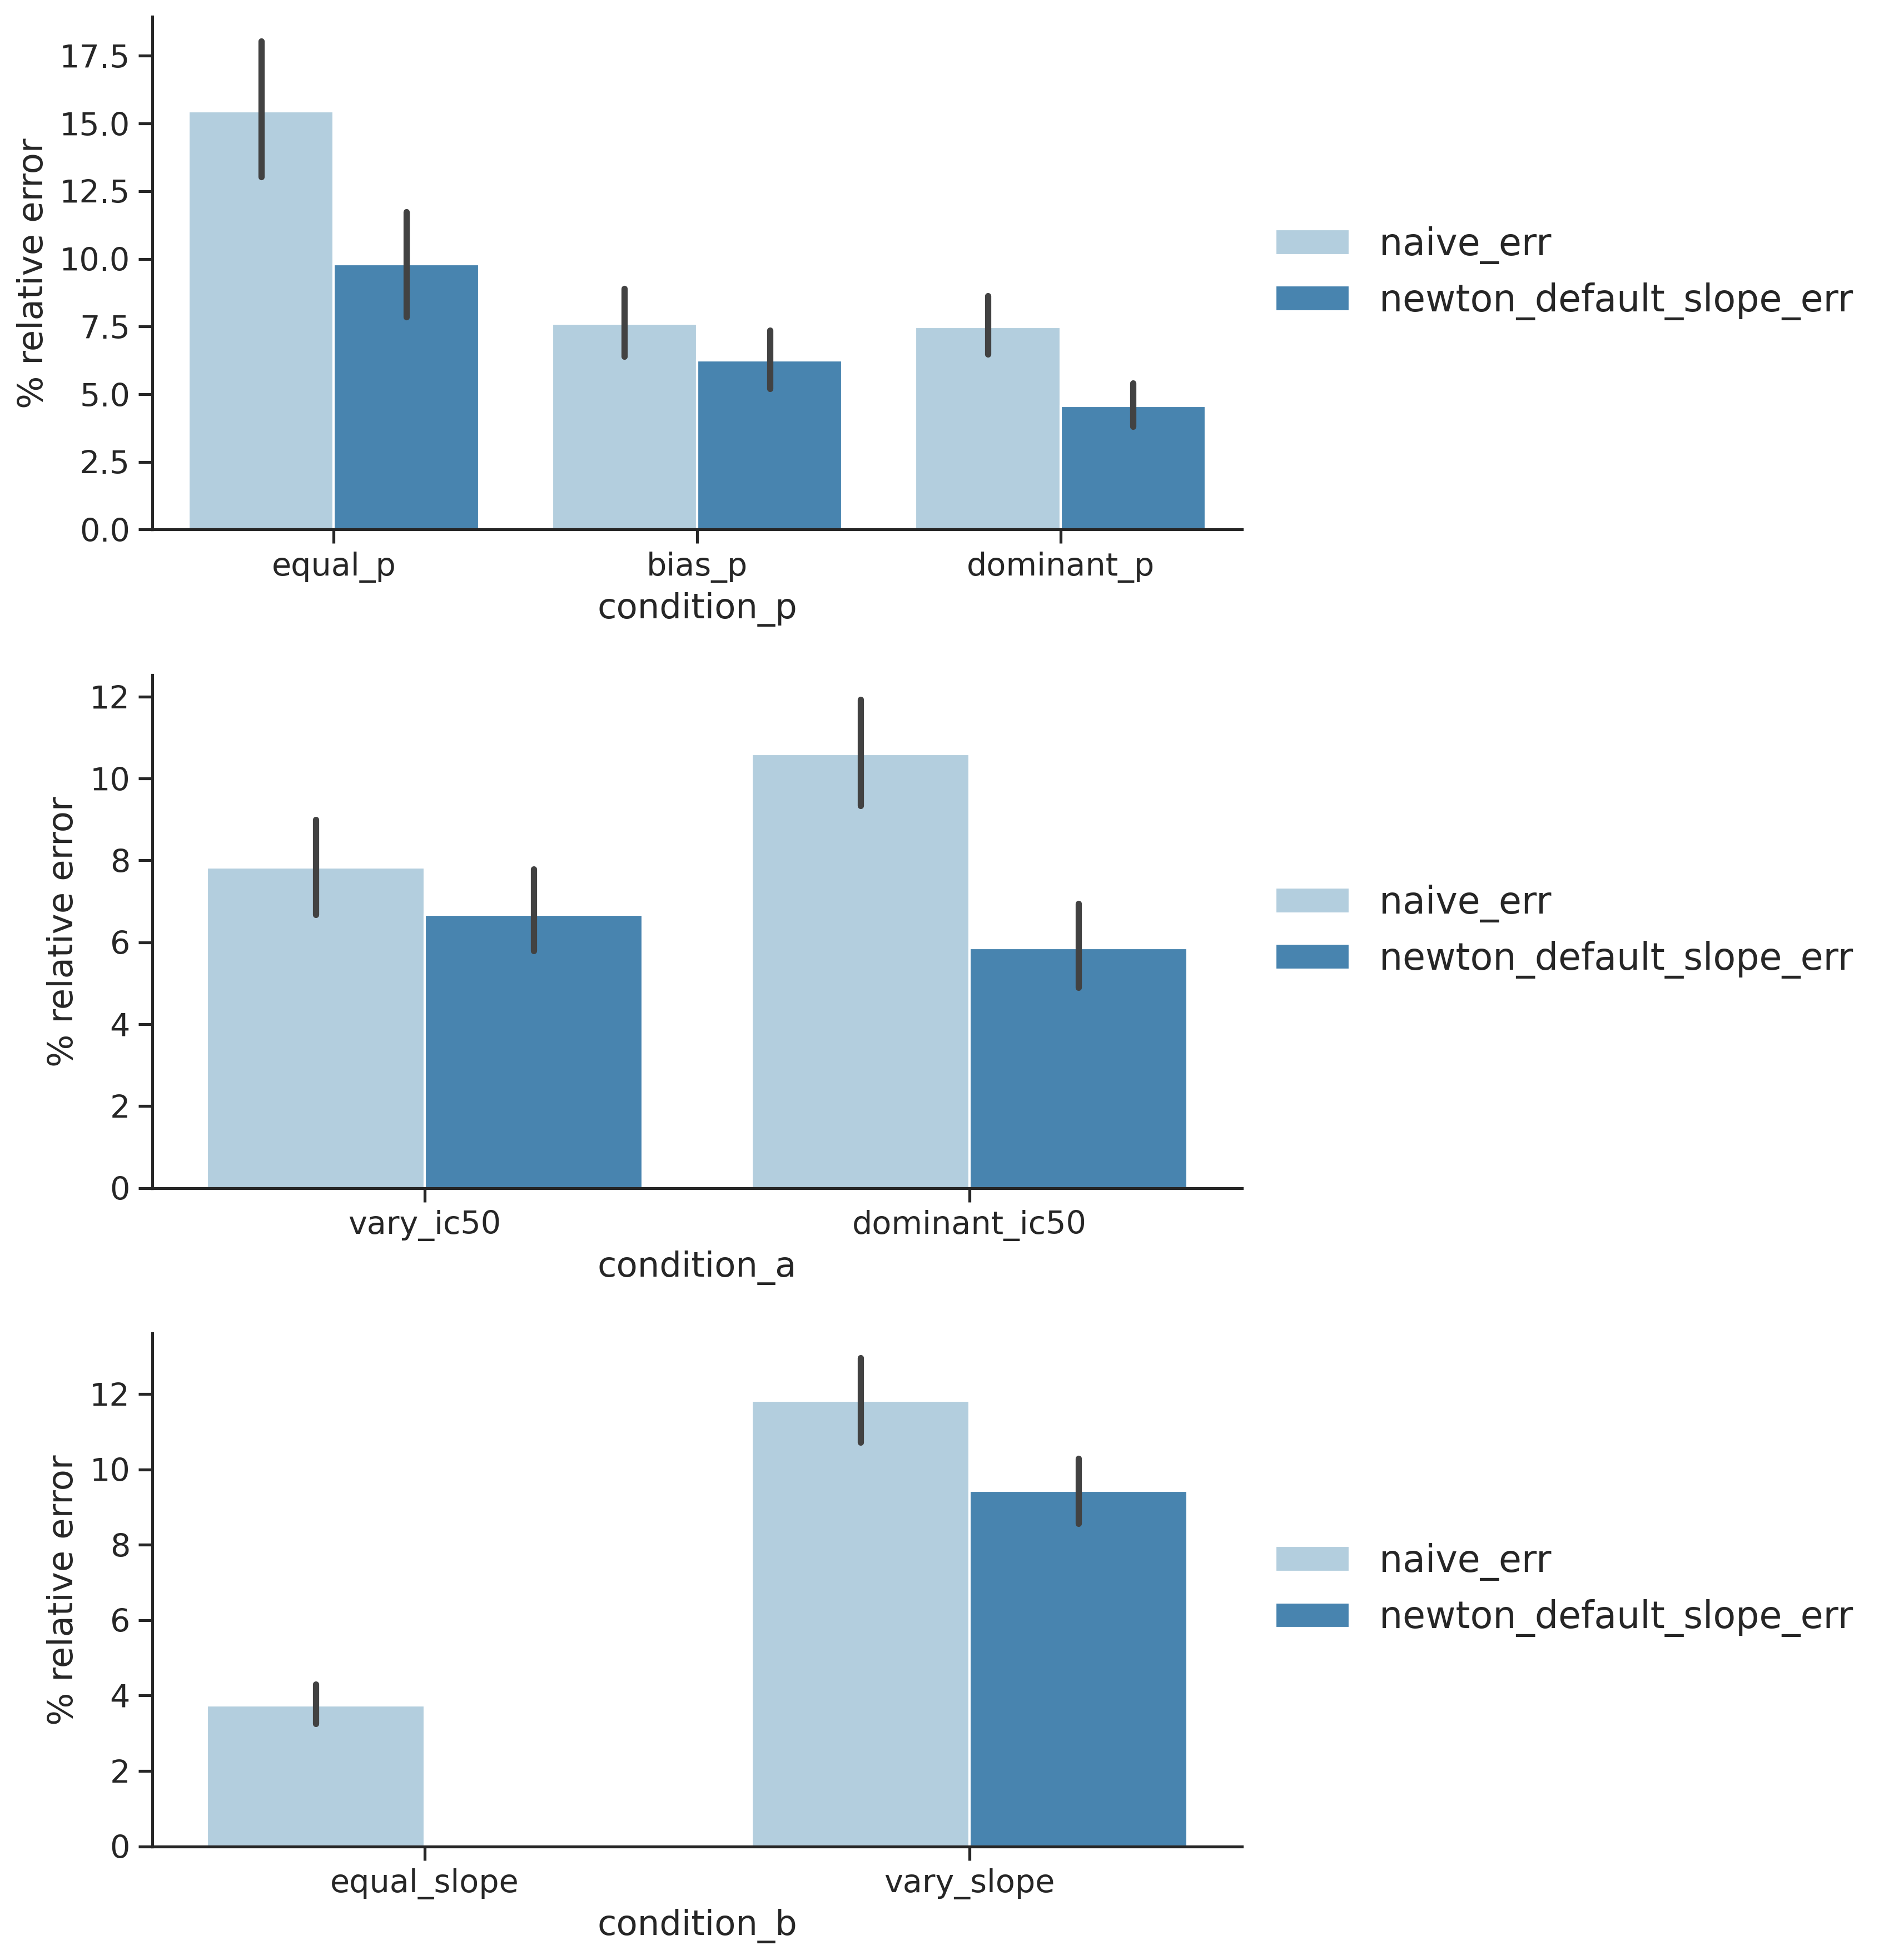

In [149]:
fig, axes = plt.subplots(figsize=(10, 12), nrows=3)

for ax, x_label in zip(axes, ['condition_p', 'condition_a', 'condition_b']):
#     sns.boxplot(data=plot_df, x=x_label, y='% relative error', hue='error_type', fliersize=3, ax=ax, palette='Blues')
    sns.barplot(data=plot_df, x=x_label, y='% relative error', hue='error_type', ci=95, ax=ax, palette='Blues')

# sns.violinplot(data=plot_df, x='condition', y='error', hue='error_type', ax=ax)
# sns.swarmplot(data=plot_df, x='condition_p', y='% relative error', hue='error_type', color='black', dodge=True, alpha=0.5, s=3, ax=ax)
# sns.swarmplot(data=plot_df, x='error_type', y='error', color='black', alpha=0.5, s=3, ax=ax

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), framealpha=0, markerscale=2., fontsize=16)

sns.despine()
plt.tight_layout()
plt.savefig('../figure/supplementary_newton_combine_bar.svg')

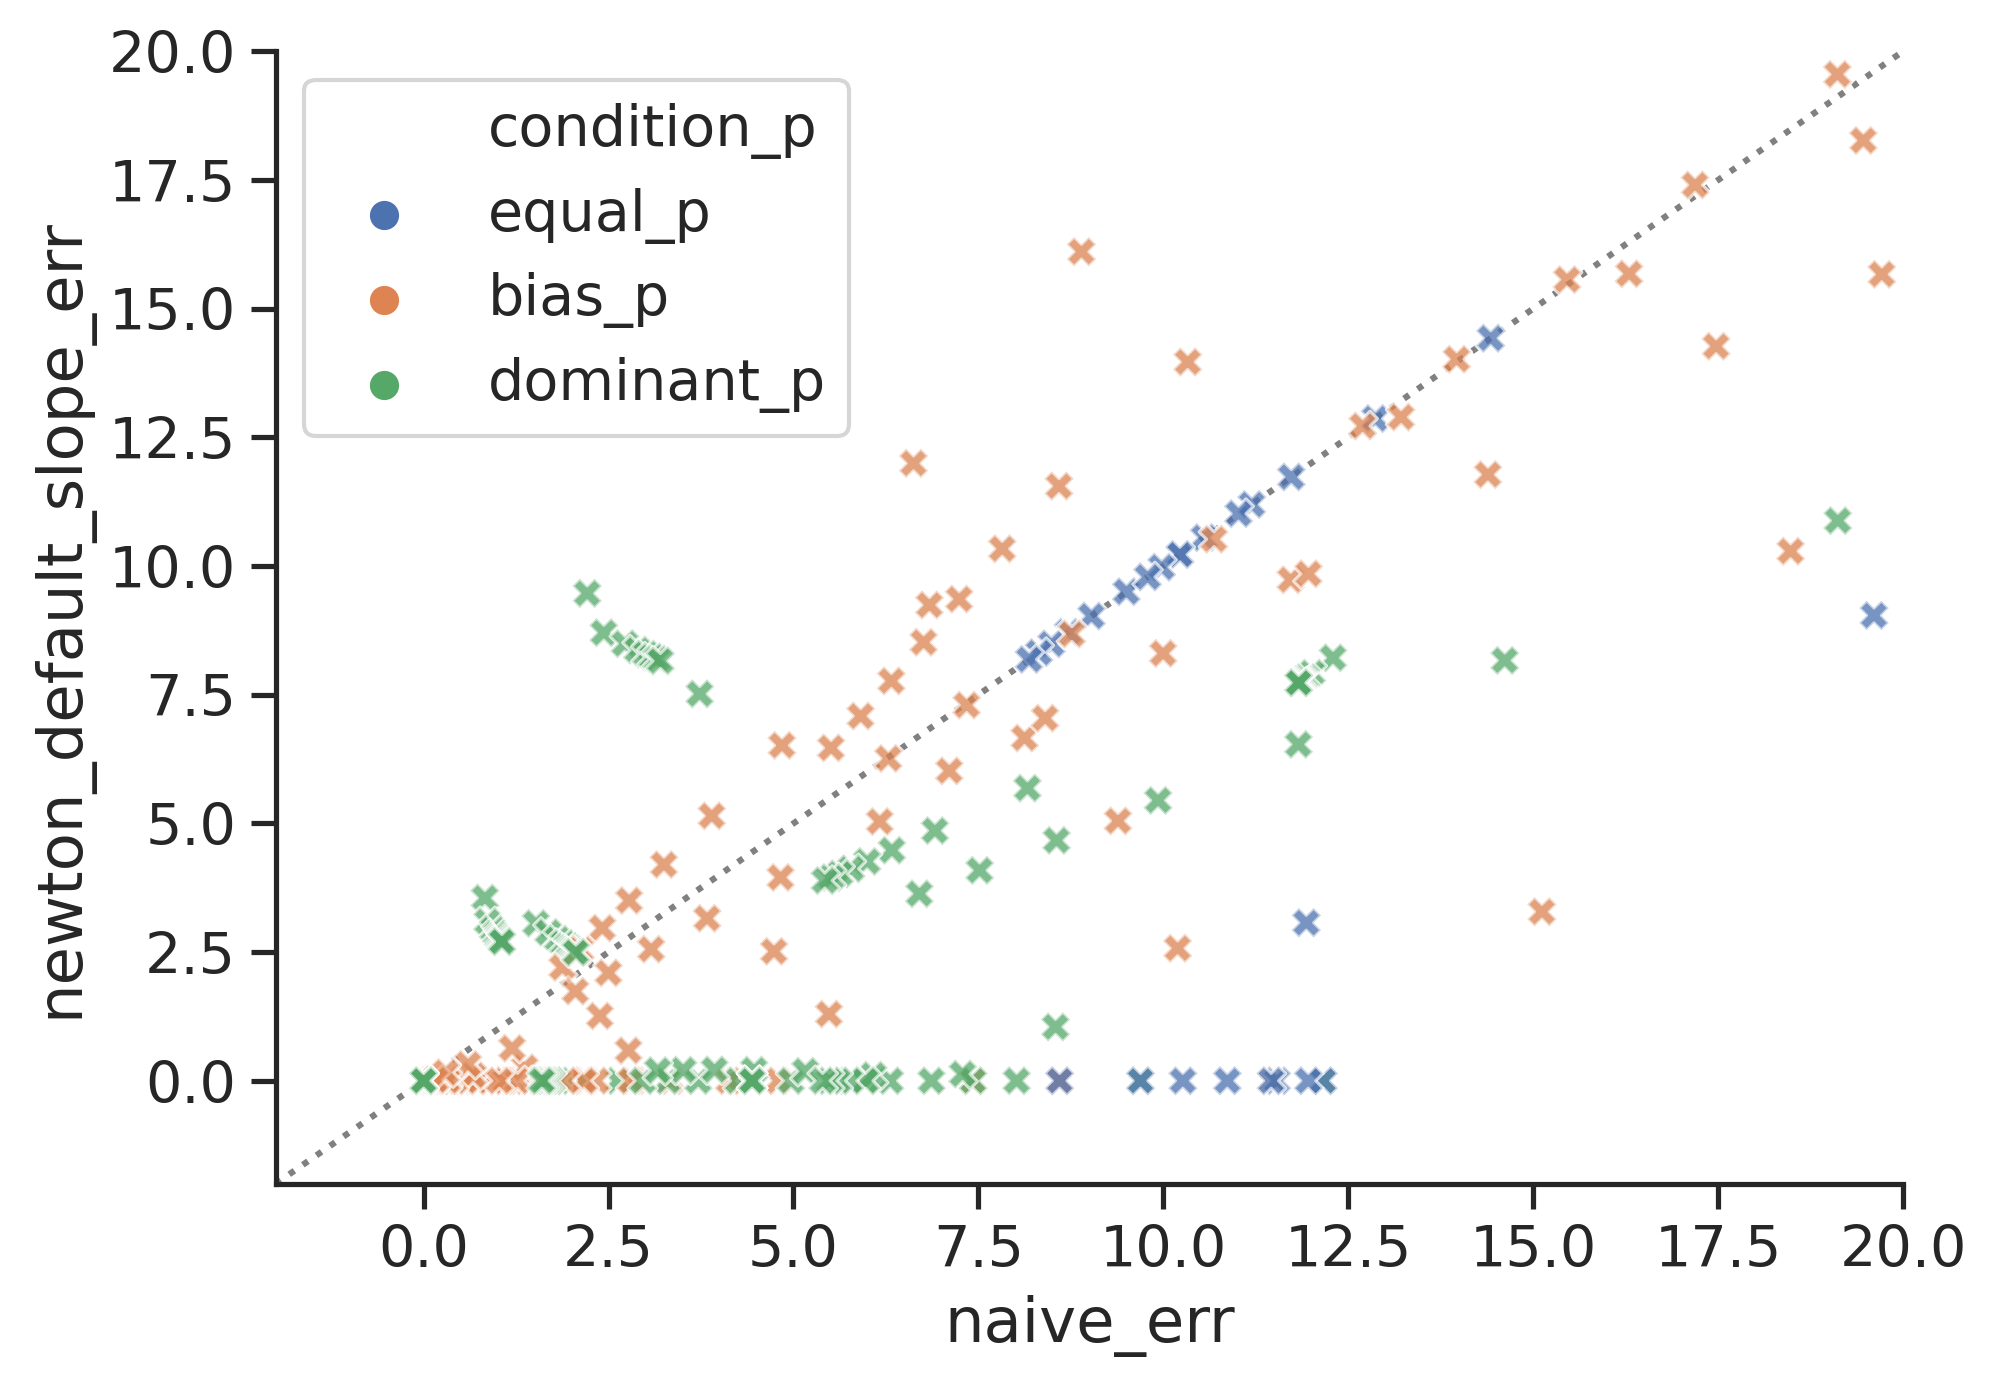

In [106]:
fig, ax = plt.subplots(figsize=(7,5))
# sns.scatterplot(result_df['naive_err'], result_df['newton_default_slope_err'], marker='X', s=50, alpha=0.8, ax=ax, color='navy')
sns.scatterplot(data=result_df, x='naive_err', y='newton_default_slope_err', hue='condition_p', marker='X', s=50, alpha=0.5, ax=ax)

min_val, max_val = -2, 20 # 0.95, 2
ax.plot((min_val, max_val), (min_val, max_val), color='grey', linestyle=':', zorder=0)
ax.set_xlim((min_val, max_val))
ax.set_ylim((min_val, max_val))

sns.despine()